### 1) Importing Libraries and our functions

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.tokenize import word_tokenize
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

### 2) Reading Data

In [2]:
data = pd.read_csv('youtube.csv')
data.head()

,link,title,description,category
0,JLZlCZ0,Ep 1| Travelling through North East India | Of...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,travel
1,i9E_Blai8vk,Welcome to Bali | Travel Vlog | Priscilla Lee,Priscilla Lee\n45.6K subscribers\nSUBSCRIBE\n*...,travel
2,r284c-q8oY,My Solo Trip to ALASKA | Cruising From Vancouv...,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,travel
3,Qmi-Xwq-ME,Traveling to the Happiest Country in the World!!,Yes Theory\n6.65M subscribers\nSUBSCRIBE\n*BLA...,travel
4,_lcOX55Ef70,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,travel


In [3]:
print(data.description[0])

Tanya Khanijow
671K subscribers
SUBSCRIBE
The journey to Arunachal, North East India begins with a train journey from Guwahati to Murkongselek. From here we head to Pasighat. And I and my travel companions are just getting started by exploring the tiny glimpse of Arunachal that we have so far. From markets to bridges, the adventure will only get better from here. :)

Next Video: 
SHOW MORE


In [4]:
data.shape

(3599, 4)

In [5]:
# getting count of null values
data.isnull().sum()

link           0
title          0
description    0
category       0
dtype: int64

In [6]:
# getting unqiue values of "category" Column
data['category'].unique()

array(['travel', 'food', 'art_music', 'history'], dtype=object)

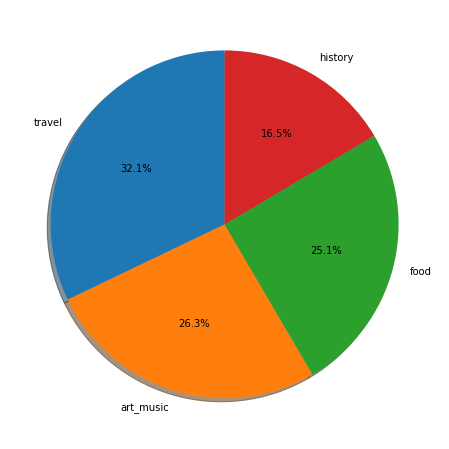

In [66]:
plt.figure(figsize=(12,8))
plt.pie(category_valueCounts,labels=category_valueCounts.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [104]:
def showWordCloud(categoryName,notInclude=['subscribers','SUBSCRIBE','subscribers'],w=15 , h= 15):
    global data
    print(f"Word Cloud for {categoryName}")
    plt.figure(figsize=(w,h))
    text = " ".join(word for word in data[data.category==categoryName].description.astype(str))
    for word in notInclude:
        text = text.replace(word , "")
    wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,max_words=90).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    

Word Cloud for food


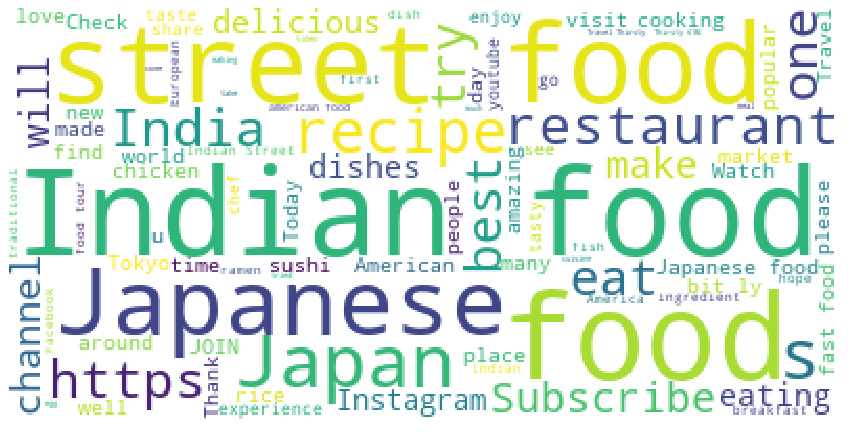

In [108]:
showWordCloud('food',['subscribers','SUBSCRIBE','subscribers','SHOW','video'])

Word Cloud for travel


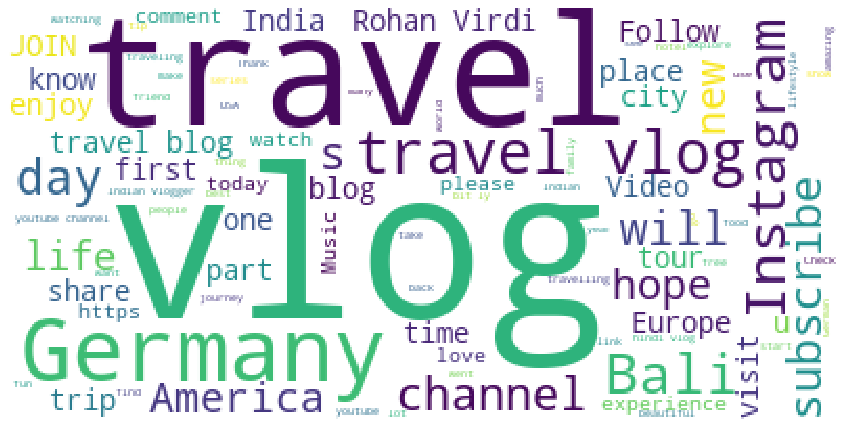

In [110]:
showWordCloud('travel',['subscribers','SUBSCRIBE','subscribers','SHOW','video'])

Word Cloud for history


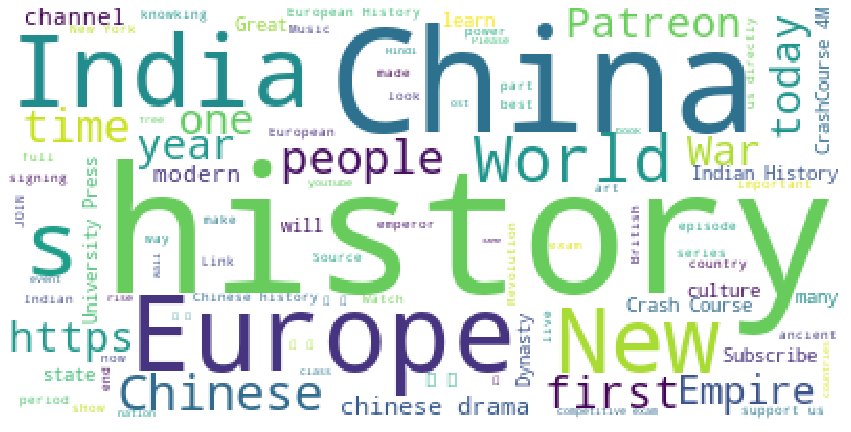

In [112]:
showWordCloud('history',['subscribers','SUBSCRIBE','subscribers','SHOW','video'])

Word Cloud for art_music


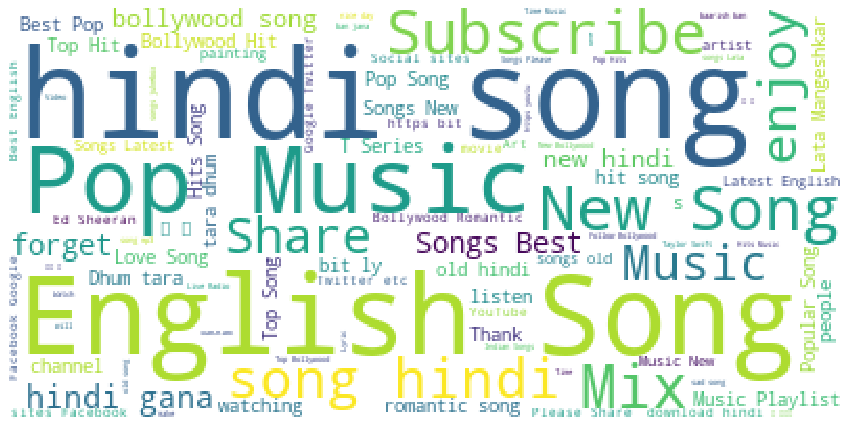

In [113]:
showWordCloud('art_music',['subscribers','SUBSCRIBE','subscribers','SHOW','video'])

### 3) Data Processing

##### 1) Remove Punctuation

In [8]:
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def removePunctuationFromText(text):
    text = ''.join([char for char in text if char not in punctuation])
    return text

In [10]:
data['descriptionNonePunct'] = data['description'].apply(removePunctuationFromText)

In [11]:
data.head()

,link,title,description,category,descriptionNonePunct
0,JLZlCZ0,Ep 1| Travelling through North East India | Of...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,travel,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...
1,i9E_Blai8vk,Welcome to Bali | Travel Vlog | Priscilla Lee,Priscilla Lee\n45.6K subscribers\nSUBSCRIBE\n*...,travel,Priscilla Lee\n456K subscribers\nSUBSCRIBE\nDI...
2,r284c-q8oY,My Solo Trip to ALASKA | Cruising From Vancouv...,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,travel,Allison Anderson\n588K subscribers\nSUBSCRIBE\...
3,Qmi-Xwq-ME,Traveling to the Happiest Country in the World!!,Yes Theory\n6.65M subscribers\nSUBSCRIBE\n*BLA...,travel,Yes Theory\n665M subscribers\nSUBSCRIBE\nBLACK...
4,_lcOX55Ef70,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,travel,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...


##### 2) Tokenize words

In [12]:
## tokenize words 
data['descriptionTokenized'] = data['descriptionNonePunct'].apply(word_tokenize)

In [13]:
data.head()

,link,title,description,category,descriptionNonePunct,descriptionTokenized
0,JLZlCZ0,Ep 1| Travelling through North East India | Of...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,travel,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,"[Tanya, Khanijow, 671K, subscribers, SUBSCRIBE..."
1,i9E_Blai8vk,Welcome to Bali | Travel Vlog | Priscilla Lee,Priscilla Lee\n45.6K subscribers\nSUBSCRIBE\n*...,travel,Priscilla Lee\n456K subscribers\nSUBSCRIBE\nDI...,"[Priscilla, Lee, 456K, subscribers, SUBSCRIBE,..."
2,r284c-q8oY,My Solo Trip to ALASKA | Cruising From Vancouv...,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,travel,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,"[Allison, Anderson, 588K, subscribers, SUBSCRI..."
3,Qmi-Xwq-ME,Traveling to the Happiest Country in the World!!,Yes Theory\n6.65M subscribers\nSUBSCRIBE\n*BLA...,travel,Yes Theory\n665M subscribers\nSUBSCRIBE\nBLACK...,"[Yes, Theory, 665M, subscribers, SUBSCRIBE, BL..."
4,_lcOX55Ef70,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,travel,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,"[Tanya, Khanijow, 671K, subscribers, SUBSCRIBE..."


##### 3) Remove stopwords

In [14]:
stopWords = stopwords.words('english')
stopWords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [15]:
def removeStopWords(text):
    return [word for word in text if word not in stopWords]

In [16]:
data['descriptionNoneSW'] =data['descriptionTokenized'].apply(removeStopWords)

In [17]:
data.head()

,link,title,description,category,descriptionNonePunct,descriptionTokenized,descriptionNoneSW
0,JLZlCZ0,Ep 1| Travelling through North East India | Of...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,travel,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,"[Tanya, Khanijow, 671K, subscribers, SUBSCRIBE...","[Tanya, Khanijow, 671K, subscribers, SUBSCRIBE..."
1,i9E_Blai8vk,Welcome to Bali | Travel Vlog | Priscilla Lee,Priscilla Lee\n45.6K subscribers\nSUBSCRIBE\n*...,travel,Priscilla Lee\n456K subscribers\nSUBSCRIBE\nDI...,"[Priscilla, Lee, 456K, subscribers, SUBSCRIBE,...","[Priscilla, Lee, 456K, subscribers, SUBSCRIBE,..."
2,r284c-q8oY,My Solo Trip to ALASKA | Cruising From Vancouv...,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,travel,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,"[Allison, Anderson, 588K, subscribers, SUBSCRI...","[Allison, Anderson, 588K, subscribers, SUBSCRI..."
3,Qmi-Xwq-ME,Traveling to the Happiest Country in the World!!,Yes Theory\n6.65M subscribers\nSUBSCRIBE\n*BLA...,travel,Yes Theory\n665M subscribers\nSUBSCRIBE\nBLACK...,"[Yes, Theory, 665M, subscribers, SUBSCRIBE, BL...","[Yes, Theory, 665M, subscribers, SUBSCRIBE, BL..."
4,_lcOX55Ef70,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,travel,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,"[Tanya, Khanijow, 671K, subscribers, SUBSCRIBE...","[Tanya, Khanijow, 671K, subscribers, SUBSCRIBE..."


##### 4) Text to Squence

In [18]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['descriptionNoneSW'])
data['textSequence'] = tokenizer.texts_to_sequences(data['descriptionNoneSW'])

In [19]:
data.head()

,link,title,description,category,descriptionNonePunct,descriptionTokenized,descriptionNoneSW,textSequence
0,JLZlCZ0,Ep 1| Travelling through North East India | Of...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,travel,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,"[Tanya, Khanijow, 671K, subscribers, SUBSCRIBE...","[Tanya, Khanijow, 671K, subscribers, SUBSCRIBE...","[1571, 1676, 1486, 4, 1, 14, 303, 4547, 286, 2..."
1,i9E_Blai8vk,Welcome to Bali | Travel Vlog | Priscilla Lee,Priscilla Lee\n45.6K subscribers\nSUBSCRIBE\n*...,travel,Priscilla Lee\n456K subscribers\nSUBSCRIBE\nDI...,"[Priscilla, Lee, 456K, subscribers, SUBSCRIBE,...","[Priscilla, Lee, 456K, subscribers, SUBSCRIBE,...","[7459, 353, 2243, 4, 1, 923, 33, 1487, 2997, 6..."
2,r284c-q8oY,My Solo Trip to ALASKA | Cruising From Vancouv...,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,travel,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,"[Allison, Anderson, 588K, subscribers, SUBSCRI...","[Allison, Anderson, 588K, subscribers, SUBSCRI...","[5642, 2707, 5643, 4, 1, 7, 631, 722, 251, 746..."
3,Qmi-Xwq-ME,Traveling to the Happiest Country in the World!!,Yes Theory\n6.65M subscribers\nSUBSCRIBE\n*BLA...,travel,Yes Theory\n665M subscribers\nSUBSCRIBE\nBLACK...,"[Yes, Theory, 665M, subscribers, SUBSCRIBE, BL...","[Yes, Theory, 665M, subscribers, SUBSCRIBE, BL...","[966, 2057, 2999, 4, 1, 549, 1922, 1572, 1056,..."
4,_lcOX55Ef70,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,travel,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,"[Tanya, Khanijow, 671K, subscribers, SUBSCRIBE...","[Tanya, Khanijow, 671K, subscribers, SUBSCRIBE...","[1571, 1676, 1486, 4, 1, 132, 24, 668, 47, 134..."


### 4) Model Building

In [20]:
input_shape = int(sum(data['textSequence'].apply(lambda x:len(x)/len(data['textSequence']))))
input_shape

49

In [21]:
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(data['textSequence'],maxlen=45)
X

array([[    0,     0,     0, ...,     6,     2,     3],
       [  353,  2243,     4, ...,   924,     2,     3],
       [    0,     0,     0, ..., 11487,     2,     3],
       ...,
       [    0,     0,     0, ..., 25353,     2,     3],
       [    0,     0,     0, ..., 25356,     2,     3],
       [    0,     0,     0, ...,   272,     2,     3]])

In [22]:
y = data['category']

In [23]:
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)
y

array([3, 3, 3, ..., 2, 2, 2])

##### Spliting the data

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size = 0.2 , random_state=42)

In [25]:
X_train.shape ,X_test.shape, y_train.shape , y_test.shape

((2879, 45), (720, 45), (2879,), (720,))

In [26]:
# getting vocabulary len
maxWords=(max(map(max, X)))+1

In [27]:
model = keras.models.Sequential([
    keras.layers.Embedding(maxWords , 64 , input_shape=[input_shape]),
    keras.layers.GRU(32),
    keras.layers.Dense(4 , activation='softmax')
])

##### Plotting Model

In [28]:
# from tensorflow.keras.utils import plot_model
# plot_model(model , show_shapes=True)

##### Compiling the model

In [29]:
model.compile(loss='sparse_categorical_crossentropy' , optimizer='adam' , metrics='accuracy')

In [30]:
history = model.fit(X_train , y_train , epochs=15 , batch_size=32 , validation_split= 0.2)

Epoch 1/15
72/72 [==============================] - 4s 30ms/step - loss: 1.3192 - accuracy: 0.3865 - val_loss: 1.0502 - val_accuracy: 0.5035
Epoch 2/15
72/72 [==============================] - 2s 23ms/step - loss: 0.8093 - accuracy: 0.6188 - val_loss: 0.7065 - val_accuracy: 0.7309
Epoch 3/15
72/72 [==============================] - 2s 23ms/step - loss: 0.3928 - accuracy: 0.8741 - val_loss: 0.5141 - val_accuracy: 0.8160
Epoch 4/15
72/72 [==============================] - 2s 23ms/step - loss: 0.1572 - accuracy: 0.9687 - val_loss: 0.4422 - val_accuracy: 0.8490
Epoch 5/15
72/72 [==============================] - 2s 23ms/step - loss: 0.0534 - accuracy: 0.9874 - val_loss: 0.4700 - val_accuracy: 0.8542
Epoch 6/15
72/72 [==============================] - 2s 23ms/step - loss: 0.0263 - accuracy: 0.9957 - val_loss: 0.5455 - val_accuracy: 0.8351
Epoch 7/15
72/72 [==============================] - 2s 23ms/step - loss: 0.0170 - accuracy: 0.9974 - val_loss: 0.5207 - val_accuracy: 0.8646
Epoch 8/15
72

(0, 1)

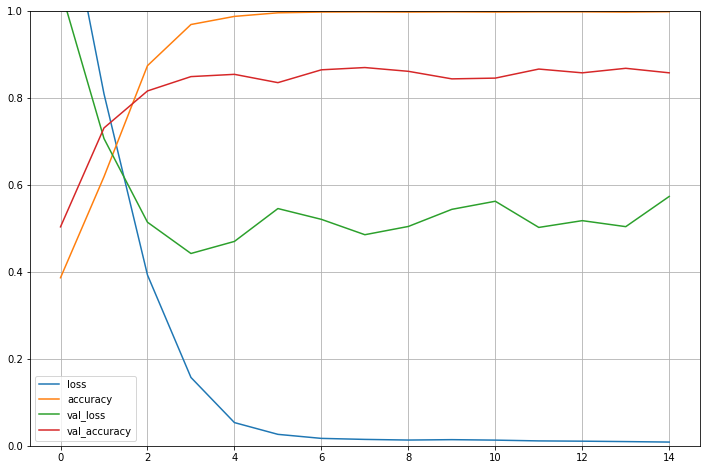

In [31]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
# set vertical range between 0 , 1
plt.gca().set_ylim(0,1)

In [32]:
model_evaluated = model.evaluate(X_test , y_test)

23/23 [==============================] - 0s 4ms/step - loss: 0.5603 - accuracy: 0.8597


In [33]:
print(f'Model evaluated Loss is {model_evaluated[0]}')
print(f'Model evaluated accuracy is {model_evaluated[1]}')

Model evaluated Loss is 0.5603489279747009
Model evaluated accuracy is 0.8597221970558167


##### Confusion Matrix and Classification Report 

In [34]:
y_pred = (model.predict(X_test).argmax(axis=-1)).tolist()
class_names = y_encoder.classes_
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

Classification report : 
               precision    recall  f1-score   support

   art_music       0.97      0.85      0.91       170
        food       0.69      0.93      0.79       174
     history       0.92      0.88      0.90       119
      travel       0.94      0.81      0.87       257

    accuracy                           0.86       720
   macro avg       0.88      0.87      0.87       720
weighted avg       0.88      0.86      0.86       720



In [35]:
def drawConfusionMatrix(true, preds, normalize=None):
  confusionMatrix = confusion_matrix(true, preds, normalize = normalize)
  confusionMatrix = np.round(confusionMatrix, 2)
  sns.heatmap(confusionMatrix, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
  plt.show()

Confusion matrix : 



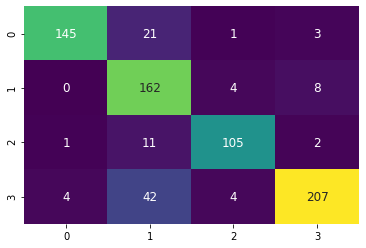

Normalized confusion matrix : 



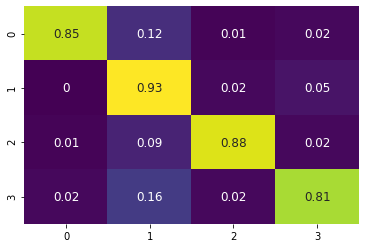

In [36]:
print("Confusion matrix : \n")
drawConfusionMatrix(y_test, y_pred)
print("Normalized confusion matrix : \n")
drawConfusionMatrix(y_test, y_pred,"true")